Ví dụ 1:

a, Sử dụng thư viện Numpy & Pandas

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

In [6]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [7]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

In [8]:
pi_list

array([0.33333333, 0.33333333, 0.33333333])

In [9]:
mu_list

[array([[5.006, 3.428]]), array([[5.936, 2.77 ]]), array([[6.588, 2.974]])]

In [10]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
#Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )
        * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] )
        * pi_list[p])
        scores_list.append(score)
        
    return np.argmax(scores_list)

In [11]:
X = np.array(df1.iloc[:, 0:2])

In [12]:
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_5555/3899806965.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()


In [13]:
y_pred = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    y_pred[i] = predict_NB_gaussian_class( X[i], mu_list, std_list, pi_list)

print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_pred, y_labels)


0.78

In [16]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Đọc tệp dữ liệu Cancer.csv trong file data_cancer
df = pd.read_csv('/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab1/breast-cancer-wisconsin.data')

print(df.head() )
# Tách dữ liệu Test ,Chọn 80 mẫu lành tính (Trường phân loại là 2) và 40 mẫu ác tính (Trường phân loại là 4) làm dữ liệu Test, còn lại là dữ liệu Training

#Lấy ngẫu nhiên 80 mẫu lành tính mà cột "Loai" là 2
test_benign = df[df.iloc[: ,10] == 2].sample(80)

#Lấy ngẫu nhiên 40 mẫu ác tính mà cột "Loai" là 4
test_malignant = df[df.iloc[:, 10] == 4].sample(40)

   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4


In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

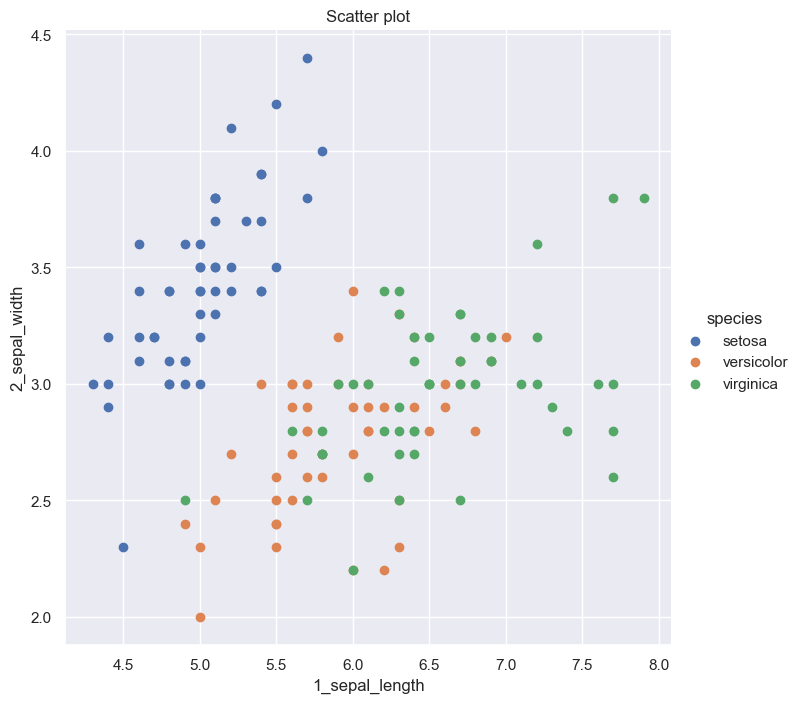

In [17]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", ) .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

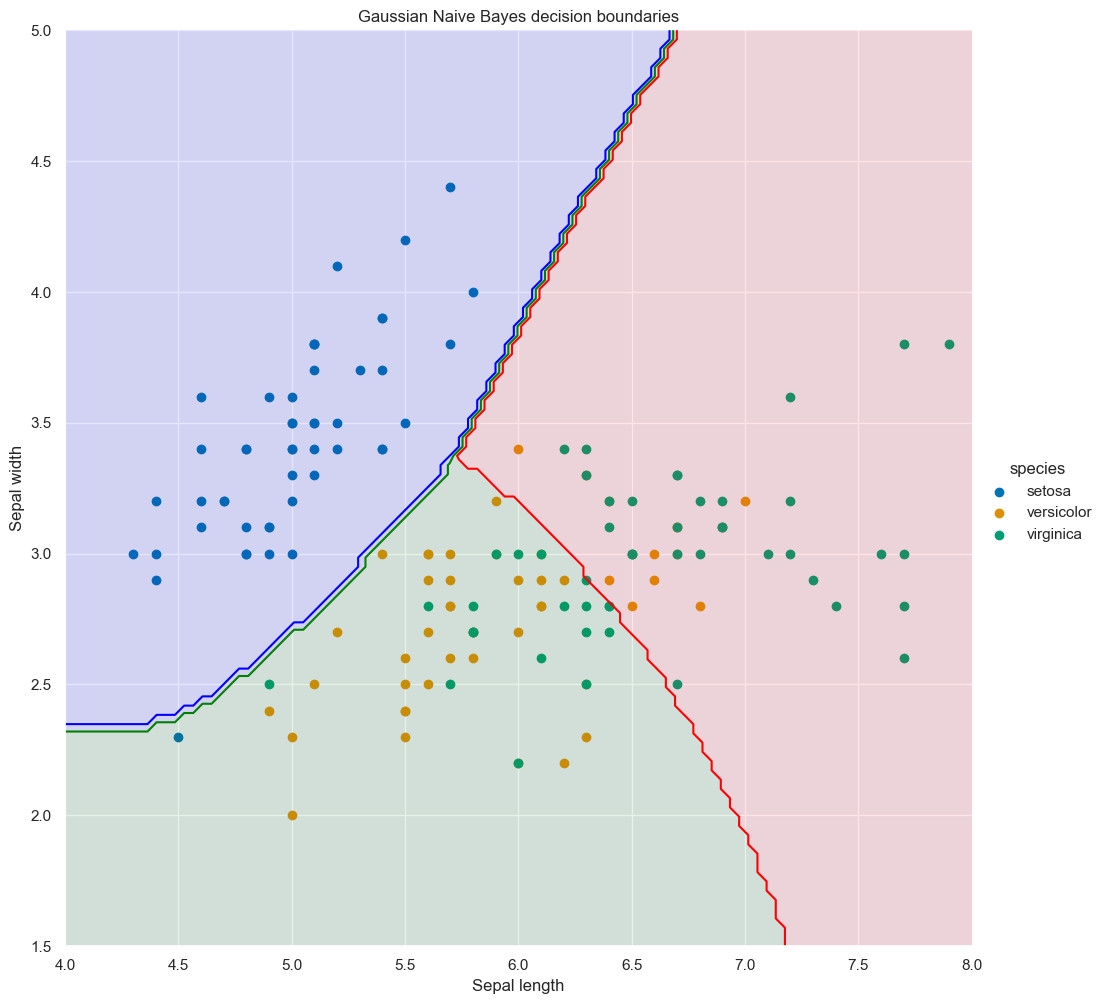

In [18]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):
#Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )* norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] )* pi_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)
def predict_Bayes_class(X,mu_list,sigma_list):
#Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)

#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list)
for xx, yy in zip(np.ravel(X), np.ravel(Y))] )
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

b. Sử dụng scikit-learning

/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_5555/3403764567.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/

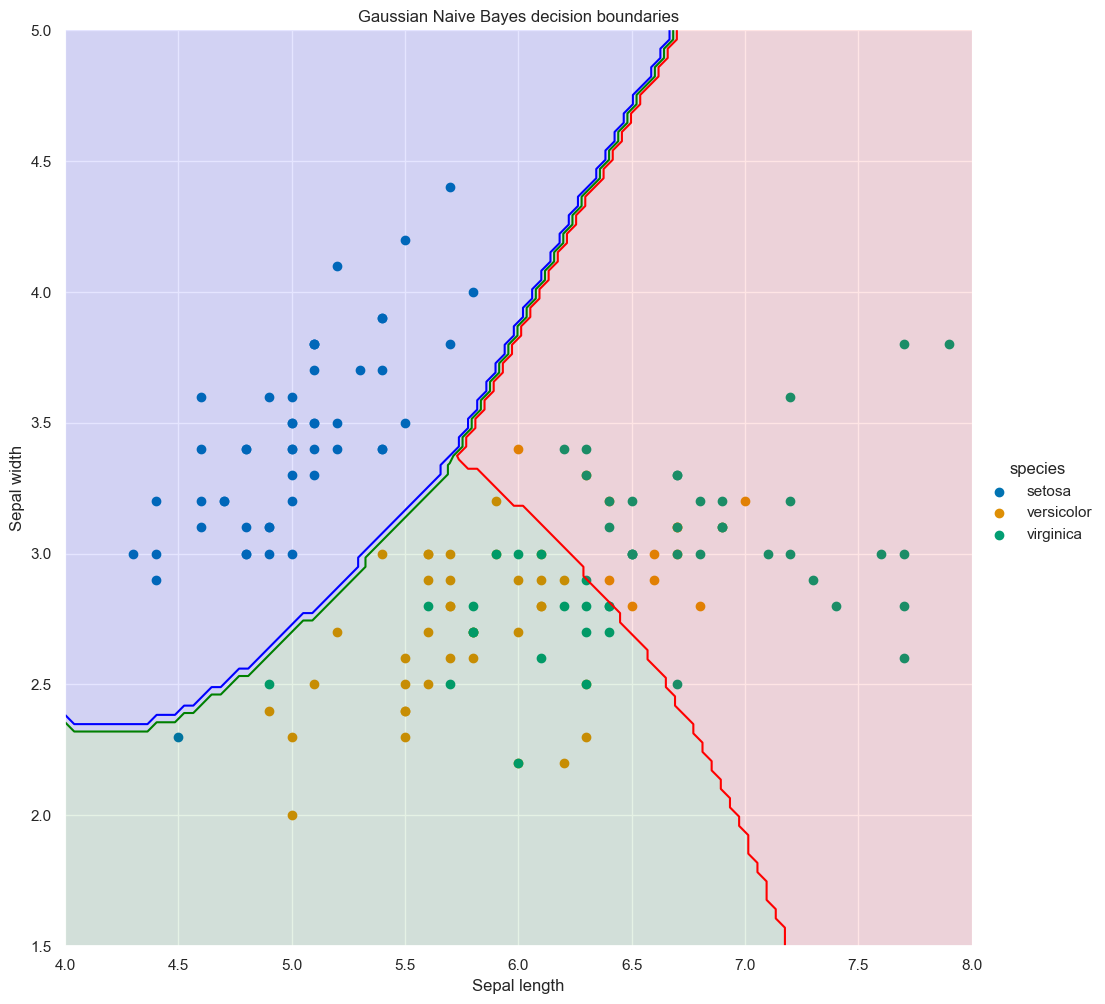

In [19]:
from sklearn.naive_bayes import GaussianNB
#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)
# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)
g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",) .add_legend()
my_ax = g.ax
#Computing the predicted class function for each value on the grid
zz = np.array( [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)
#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()

Bài tập mở rộng: Hãy mở rộng phần code đã có, để thực hiện phân loại với đầu vào là đủ 04 thuộc tính của dữ liệu. Chia tập dữ liệu thành train:test theo tỉ lệ 4:1, huấn luyện và dự đoán trên tập test, sau đó tính độ chính xác theo các chỉ số (độ đo) đã học.

1 : Load bộ dữ liệu & tiền xử lý

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu iris từ seaborn
iris = sns.load_dataset("iris")
iris = iris.rename(index=str, columns={
    'sepal_length': '1_sepal_length',
    'sepal_width': '2_sepal_width',
    'petal_length': '3_petal_length',
    'petal_width': '4_petal_width'
})

iris.head()


,1_sepal_length,2_sepal_width,3_petal_length,4_petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2: Chuẩn bị dữ liệu (X,y)

In [21]:
# X = 4 thuộc tính
X = iris[['1_sepal_length','2_sepal_width','3_petal_length','4_petal_width']]
# y = nhãn dạng số
y = iris['species'].replace({'setosa':0,'versicolor':1,'virginica':2})

/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_5555/1631336159.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = iris['species'].replace({'setosa':0,'versicolor':1,'virginica':2})


3: Chia dữ liệu train:test = 4:1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


4. Huấn luyện Gaussian Naïve Bayes

In [23]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

5. Dự đoán trên tập test

In [24]:
y_pred = model.predict(X_test)


6. Tính accuracy, precision, recall, F1-score

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


7. Ma trận nhầm lẫn (Confusion Matrix)

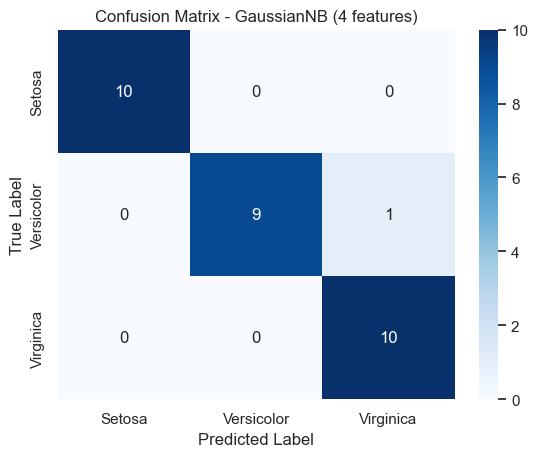

In [26]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - GaussianNB (4 features)")
plt.show()


BÀI TẬP TỰ GIẢI. MÔ HÌNH PHÂN LOẠI GAUSSIAN NAÏVE BAYES


In [75]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from  sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

df = pd.read_csv("/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab1/breast-cancer-wisconsin.data", header=None)

# Gán tên cột như mô tả đề bài
df.columns = [
    'SampleID', 'Class',
    'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epith_Cell_Size', 'Bare_Nuclei',
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'
]


# ⃣ Chuyển '?' sang NaN và loại bỏ các dòng thiếu dữ liệu
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df = df.dropna().reset_index(drop=True)  # đây là bước quan trọng





2. Xử lý dữ liệu thiếu (nếu có)

In [76]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df = df.dropna()        # bỏ các dòng thiếu dữ liệu
df = df.reset_index(drop=True)


3. Tách tập TEST theo đúng yêu cầu đề bài
80 mẫu lành tính (Class = 2)
40 mẫu ác tính (Class = 4)
Không dùng nhãn Class cho test trước khi đánh giá

Bạn muốn lấy 80 mẫu benign, nhưng thực tế chỉ có 50 mẫu → không thể sample 80 khi replace=False.
Bạn muốn lấy 40 mẫu malignant, và thực tế có 80 mẫu → phần này OK.
👉 Lỗi xuất phát từ việc lớp benign không đủ mẫu.

In [77]:


# Tách 2 lớp
benign = df[df['Class'] == 2]
malignant = df[df['Class'] == 4]

# Lấy mẫu test đúng theo yêu cầu
test_benign = benign.sample(50, random_state=42)
test_malignant = malignant.sample(40, random_state=42)
test_data = pd.concat([test_benign, test_malignant])

# Dữ liệu training = phần còn lại
train_data = df.drop(test_data.index)


4. Tạo X_train, y_train, X_test, y_test

In [78]:
# Chọn 9 thuộc tính 
feature_cols = [
    'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
    'Marginal_Adhesion', 'Single_Epith_Cell_Size', 'Bare_Nuclei',
    'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'
]
X_train = train_data[feature_cols].astype(float)
y_train = train_data['Class'].astype(int)

X_test = test_data[feature_cols].astype(float)
y_test = test_data['Class'].astype(int)



ValueError: could not convert string to float: '?'

# 5. Huấn luyện mô hình Gaussian Naïve Bayes

In [74]:
model = GaussianNB()
model.fit(X_train, y_train)


ValueError: could not convert string to float: '?'

BÀI 2

In [22]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import numpy as np

# =========================
# 1. MULTINOMIAL NAIVE BAYES
# =========================
print("=== Multinomial Naive Bayes ===")

# Train data (theo tần suất xuất hiện từ)
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]  # B
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]  # B
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]  # B
d4 = [1, 0, 0, 0, 0, 0, 1, 1, 1]  # N

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])

# Test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

clf_multi = MultinomialNB()
clf_multi.fit(train_data, label)

print("Predicting D5:", clf_multi.predict(d5)[0])
print("Probabilities D5:", clf_multi.predict_proba(d5))
print("Predicting D6:", clf_multi.predict(d6)[0])
print("Probabilities D6:", clf_multi.predict_proba(d6))


# =========================
# 2. BERNOULLI NAIVE BAYES
# =========================
print("\n=== Bernoulli Naive Bayes ===")

# Train data (theo sự xuất hiện 0/1)
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]  # B
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]  # B
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]  # B
d4 = [1, 0, 0, 0, 0, 0, 1, 1, 1]  # N

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])

# Test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

clf_bern = BernoulliNB()
clf_bern.fit(train_data, label)

print("Predicting D5:", clf_bern.predict(d5)[0])
print("Probabilities D5:", clf_bern.predict_proba(d5))
print("Predicting D6:", clf_bern.predict(d6)[0])
print("Probabilities D6:", clf_bern.predict_proba(d6))


=== Multinomial Naive Bayes ===
Predicting D5: B
Probabilities D5: [[0.68173898 0.31826102]]
Predicting D6: N
Probabilities D6: [[0.45171681 0.54828319]]

=== Bernoulli Naive Bayes ===
Predicting D5: N
Probabilities D5: [[0.44942815 0.55057185]]
Predicting D6: N
Probabilities D6: [[0.44942815 0.55057185]]


Bài 3:


In [25]:
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================
# Cấu hình đường dẫn & tham số
# ============================
path = "/Users/nguyencongtri/Downloads/ex6DataPrepared/"   # sửa đúng đường dẫn tuyệt đối
train_data_fn = "train-features.txt"
test_data_fn = "test-features.txt"
train_label_fn = "train-labels.txt"
test_label_fn = "test-labels.txt"

nwords = 2500   # số từ trong từ điển

# ============================
# Hàm đọc dữ liệu
# ============================
def read_data(data_fn, label_fn):
    # Đọc nhãn
    with open(path + label_fn) as f:
        content = f.readlines()
        label = [int(x.strip()) for x in content]

    # Đọc dữ liệu sparse
    with open(path + data_fn) as f:
        content = f.readlines()
    content = [x.strip() for x in content]

    dat = np.zeros((len(content), 3), dtype=int)
    for i, line in enumerate(content):
        a = line.split(" ")
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])

    # COO matrix: (value, (row, col))
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),
                      shape=(len(label), nwords))
    return data, label

# ============================
# Đọc training & test data
# ============================
train_data, train_label = read_data(train_data_fn, train_label_fn)
test_data, test_label = read_data(test_data_fn, test_label_fn)

# ============================
# Huấn luyện Multinomial Naive Bayes
# ============================
clf = MultinomialNB()
clf.fit(train_data, train_label)

# ============================
# Dự đoán & đánh giá
# ============================
y_pred = clf.predict(test_data)

print("Accuracy:", accuracy_score(test_label, y_pred))
print("\nClassification Report:\n", classification_report(test_label, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(test_label, y_pred))


Accuracy: 0.9807692307692307

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       130
           1       0.97      0.99      0.98       130

    accuracy                           0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260


Confusion Matrix:
 [[126   4]
 [  1 129]]


Bai4:


In [29]:
# -*- coding: utf-8 -*-
from __future__ import print_function, division, unicode_literals
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Đường dẫn tới file CSV (file nằm cùng thư mục với script)
file_path = "/Users/nguyencongtri/Downloads/ex6DataPrepared/multinomial_nb_orders.csv"

# 1. Đọc dữ liệu
df = pd.read_csv(file_path)

# 2. Tách nhãn và đặc trưng
X = df.drop(columns=['cuisine'])  # tất cả các cột ngoại trừ cuisine là feature
y = df['cuisine']                 # cột cuisine là nhãn

# 3. Encode các cột category sang số (MultinomialNB yêu cầu số nguyên)
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 4. Encode nhãn
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 5. Chia dữ liệu train:test = 7:3
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 6. Huấn luyện Multinomial Naïve Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 7. Dự đoán trên tập test
y_pred = clf.predict(X_test)

# 8. Đánh giá kết quả
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy trên tập test: {accuracy:.4f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_))


Accuracy trên tập test: 0.1744

Classification report:
               precision    recall  f1-score   support

     american       0.18      0.24      0.21       121
      chinese       0.15      0.23      0.18       111
       indian       0.25      0.37      0.30        84
      italian       0.14      0.14      0.14        86
     japanese       0.04      0.01      0.02        91
       korean       0.00      0.00      0.00        59
mediterranean       0.09      0.03      0.04        74
      mexican       0.06      0.03      0.04        92
         thai       0.19      0.28      0.22        93
   vietnamese       0.21      0.31      0.25        89

     accuracy                           0.17       900
    macro avg       0.13      0.16      0.14       900
 weighted avg       0.14      0.17      0.15       900


Bai 5:

In [35]:
# -*- coding: utf-8 -*-
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Đường dẫn chính xác tới file CSV
file_path = "/Users/nguyencongtri/Downloads/bernoulli_nb_symptoms.csv"

# 1. Đọc dữ liệu
df = pd.read_csv(file_path)

# Kiểm tra dữ liệu
print("Kích thước dữ liệu:", df.shape)
print(df.head())

# Sửa lại: cột nhãn là 'condition'
X = df.drop(columns=['condition'])
y = df['condition']

# 2. Chia dữ liệu thành train và test (tỉ lệ 6:4)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 3. Khởi tạo và huấn luyện mô hình Bernoulli Naive Bayes
clf = BernoulliNB()
clf.fit(X_train, y_train)

# 4. Dự đoán trên tập test
y_pred = clf.predict(X_test)

# 5. Đánh giá kết quả
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Kích thước dữ liệu: (2500, 31)
     condition  fever  chills  runny_nose  sneezing  cough  sore_throat  \
0  food_poison      1       0           1         0      0            0   
1          flu      0       0           0         0      0            0   
2          flu      0       0           0         0      1            0   
3  stomach_bug      0       0           0         0      1            1   
4  food_poison      0       0           0         0      0            0   

   headache  nausea  vomiting  ...  dehydration_signs  dry_mouth  dark_urine  \
0         0       0         0  ...                  0          0           0   
1         1       0         0  ...                  0          0           0   
2         0       0         0  ...                  0          1           0   
3         0       0         0  ...                  0          0           0   
4         0       0         0  ...                  0          0           0   

   rapid_heart_rate  sweating  itchy_